In [1]:
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt
import pickle

import sys
sys.path.insert(0,'./src/')

from utils import *
from pipe import *
from pipe_system import PipeSystem
from abstract_pipe import *
from pipe_system.let_index import LetIndex
from multiply_connected_pipe import MultiplyConnectedPipeFromPipeSystem

In [2]:
with open('./exp1/dev_Pipes.pickle','rb') as f:
    pipes, shifts = pickle.load(f)

In [3]:
bdr_pipe = BoundaryPipe([BoundaryLet(-5,0,0,1,-1),BoundaryLet(31,0,np.pi,1,1)])
real_pipes = [RealPipe(p,shift_x=shift[0],shift_y=shift[1]) for p,shift in zip(pipes,shifts)]
ps = PipeSystem(real_pipes,bdr_pipe)
pipe = MultiplyConnectedPipeFromPipeSystem(ps)

In [4]:
pipe.clear_geometry()
pipe.build(max_distance=0.1,fmm=False)

In [13]:
pipe.boundaries[1].curves[:2], pipe.boundaries[1].curves[0].a.shape

([<curve.line.Line at 0x12e346b60>, <curve.corner.Corner at 0x12e346d10>],
 (128,))

In [7]:
pipe.indices_of_boundary[1]

(3808, 6336)

In [15]:
start = 3808 + 128
end = start + 16

In [17]:
a_p = pipe.boundaries[1].curves[1].panels[0].a
domain = pipe.boundaries[1].curves[1].panels[0].domain
omega_p = pipe.omegas[0][start:end]

In [27]:
domain

(-1, -0.9375)

In [18]:
np.polynomial.legendre.Legendre.fit(a_p, omega_p, deg=15, domain=domain).coef

array([ 3.19201939e+01+4.89193836e+00j,  2.34832892e-03-6.47864040e-03j,
       -9.42432928e-06+1.83990438e-05j, -8.59363225e-08+1.94083736e-07j,
       -9.54773895e-09+1.41406969e-08j, -1.59897210e-09+2.51828633e-09j,
       -7.43899306e-11+2.42304659e-10j,  1.80462374e-10-2.03187709e-10j,
        7.47894113e-11-9.63581442e-11j, -7.03547832e-11+9.34591757e-11j,
        1.39370769e-11-2.07404512e-11j, -4.06051213e-12+6.02237339e-12j,
       -8.42691548e-11+1.11401516e-10j, -2.68553873e-11+3.66437749e-11j,
       -1.14900063e-10+1.53266944e-10j, -1.21273297e-11+1.32563733e-11j])

In [28]:
a_dense, omega_dense = np.polynomial.legendre.Legendre.fit(a_p, omega_p, deg=15, domain=domain).linspace(100)

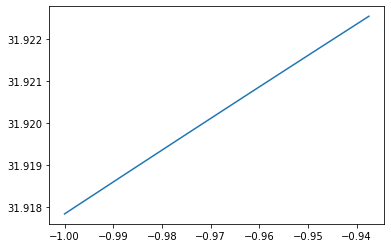

In [31]:
plt.plot(a_dense,omega_dense.real)

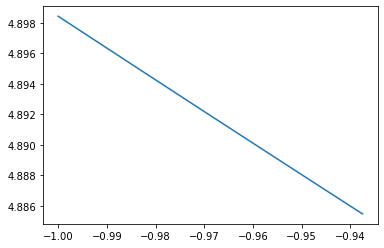

In [32]:
plt.plot(a_dense,omega_dense.imag)